Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


C:\Users\xuchangchang\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0.9097
step 0, training accuracy 0.07
step 100, training accuracy 0.86
step 200, training accuracy 0.93
step 300, training accuracy 0.94
step 400, training accuracy 0.97
step 500, training accuracy 0.97
step 600, training accuracy 0.95
step 700, training accuracy 0.96
step 800, training accuracy 0.96
step 900, training accuracy 0.97
step 1000, training accuracy 0.97
step 1100, training accuracy 0.98
step 1200, training accuracy 0.95
step 1300, training accuracy 0.98
step 1400, training accuracy 0.97
step 1500, training accuracy 0.97
step 1600, training accuracy 1
step 1700, training accuracy 0.99
step 1800, training accuracy 0.97
step 1900, training accuracy 0.97
test accuracy 0.9818
卷积层1:


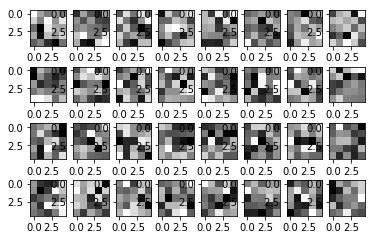

卷积层2:


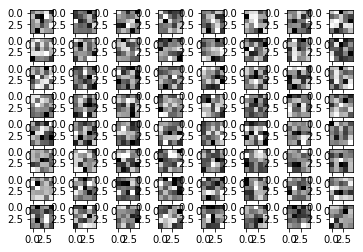

In [4]:
#%%数据导入
import tensorflow as tf#引入tensorflow框架
from tensorflow.examples.tutorials.mnist import input_data#引入数据导入包
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)#加载mnist数据包

#%%搭建简易神经网络模型
# create the session
sess = tf.InteractiveSession()
# create variables and run the session
x = tf.placeholder('float', shape=[None, 784])#分配内存
y_ = tf.placeholder('float', shape=[None, 10])
W = tf.Variable(tf.zeros([784, 10]))#设置变量（权重值与阈值）
b = tf.Variable(tf.zeros([10]))
sess.run(tf.global_variables_initializer())#初始化变量
# define the net and loss function
y = tf.nn.softmax(tf.matmul(x, W) + b)#使用sigmoid函数
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
# train the model
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)#使用梯度下降优化算法
for i in range(1000):
  batch = mnist.train.next_batch(50)#选取批量大小为50
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})
# evaluate the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))#正确预测
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))#准确度
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

#%%搭建卷积神经网络模型
# initilize the weight
def weight_variable(shape):#权重初始化为一个接近0的很小的正数
    initial = tf.truncated_normal(shape, stddev=0.1)  
    return tf.Variable(initial)

def bias_variable(shape):#阈值初始化为常数0.1
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# convolutional and pooling
def conv2d(x, W):#使用卷积步长为1（stride size）,0边距（padding size）
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):  #池化用简单传统的2x2大小的模板做最大池化（max pooling）
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
    
# the first convolution layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# the second convolution layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# dense layer/full_connected layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# dropout to prevent overfitting
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# model output
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# model trainning and evaluating
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(tf.initialize_all_variables())

import matplotlib.pyplot as plt#导入matplotlib画图模块

for i in range(2000):
    batch = mnist.train.next_batch(100)  
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})#训练准确度

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))#测试准确度

print('卷积层1:')#打印卷积层1的权重值
im1 = sess.run(W_conv1)
for m in range(0,32):
    plt.subplot(4,8,m+1);plt.imshow(im1[:,:,0,m],cmap = 'gray')
plt.show()
print('卷积层2:')#打印卷积层2的权重值
im2 = sess.run(W_conv2)
for n in range(0,64):
    plt.subplot(8,8,n+1);plt.imshow(im2[:,:,0,n],cmap = 'gray')
plt.show()